# Final project: Recurrent neural networks

For this specific task we will be using a recurrent neural network to create a model to classify 60,000 Stack Overflow Questions, each with a quality score.

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
tf.test.gpu_device_name()


'/device:GPU:0'

In [4]:
# import dataset
df = pd.read_csv("data.csv")

In [5]:
df.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT
2,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
3,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
4,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            60000 non-null  int64 
 1   Title         60000 non-null  object
 2   Body          60000 non-null  object
 3   Tags          60000 non-null  object
 4   CreationDate  60000 non-null  object
 5   Y             60000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.7+ MB


# Data cleaning

In [7]:
from bs4 import BeautifulSoup

In [8]:
# parse text from html file using BeautifulSoup
df.Body = df.Body.apply(lambda x: BeautifulSoup(x, 'html.parser').text)

In [9]:
df.Body

0        I'm already familiar with repeating tasks ever...
1        I am having 4 different tables like \r\nselect...
2        I'd like to understand why Java 8 Optionals we...
3        I am attempting to overlay a title over an ima...
4        The question is very simple, but I just could ...
                               ...                        
59995    I try to multiply an integer by a double but I...
59996    I'm very new to programming and I'm teaching m...
59997        *URLS.PY*\r\n    //URLS.PY FILE\r\n    fro...
59998    I have a controller inside which a server is c...
59999    So i was recently helping someone out with som...
Name: Body, Length: 60000, dtype: object

In [10]:
# a final text file is created that inclused both the title and the body of the Stack Overflow question
df['text'] = df['Title'] + " " + df['Body']

In [11]:
document_sizes = np.array([len(i.split()) for i in df.Body])

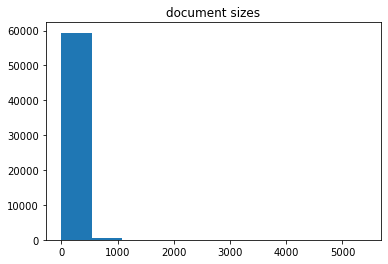

In [12]:
# Document sizes for the complete data set, size is a word in this case
plt.hist(document_sizes)
plt.title('document sizes')
plt.show()

<AxesSubplot:>

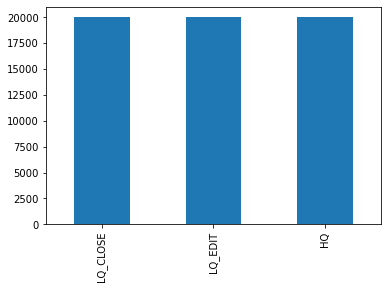

In [13]:
# Quality counts for question is exactly the same
df.Y.value_counts().plot.bar()


In [14]:
from nltk.corpus import stopwords
import re

In [15]:
stop_words = stopwords.words('english')

In [16]:
clean_X = df['text']

In [17]:
clean_X

0        Java: Repeat Task Every Random Seconds I'm alr...
1        How to get all the child records from differen...
2        Why are Java Optionals immutable? I'd like to ...
3        Text Overlay Image with Darkened Opacity React...
4        Why ternary operator in swift is so picky? The...
                               ...                        
59995    C++ The correct way to multiply an integer and...
59996    How can I make a c# application outside of vis...
59997    WHY DJANGO IS SHOWING ME THIS ERROR WHEN I TRY...
59998    PHP - getting the content of php page I have a...
59999    Why can't overloaded functions vary only by re...
Name: text, Length: 60000, dtype: object

In [18]:
# function to only keep alphabet characters inside the text
def data_cleaning(data):
    data = data.lower()
    data = re.sub(r'[^(a-zA-Z)\s]','',data)

    return data

In [19]:
clean_X = pd.DataFrame({'text':clean_X}).text.apply(data_cleaning)

In [612]:
clean_X

0        java repeat task every random seconds im alrea...
1        how to get all the child records from differen...
2        why are java optionals immutable id like to un...
3        text overlay image with darkened opacity react...
4        why ternary operator in swift is so picky the ...
                               ...                        
59995    c the correct way to multiply an integer and a...
59996    how can i make a c application outside of visu...
59997    why django is showing me this error when i try...
59998    php  getting the content of php page i have a ...
59999    why cant overloaded functions vary only by ret...
Name: text, Length: 60000, dtype: object

In [42]:
MAX_NUM_WORDS = 10000
MAX_LEN = 300

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [615]:

#vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=MAX_NUM_WORDS, output_sequence_length=MAX_LEN)
#text_ds = tf.data.Dataset.from_tensor_slices(clean_X).batch(128)
#vectorizer.adapt(text_ds)

In [619]:
#voc = [i.decode('utf-8') for i in vectorizer.get_vocabulary()]
#word_index = dict(zip(voc, range(len(voc))))

In [587]:
#tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_NUM_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

#tokenizer.fit_on_texts(clean_X)

In [622]:
#x_train = vectorizer(np.array([[s] for s in X_train])).numpy()
#x_test = vectorizer(np.array([[s] for s in X_test])).numpy()

In [24]:
#Encode labels

encoder = LabelEncoder()
y = encoder.fit_transform(df.Y.values)


In [25]:
y = tf.keras.utils.to_categorical(y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(clean_X, y, train_size = 0.80, random_state = 42, shuffle = True, stratify = y)

In [31]:
X_train.shape

(48000,)

In [32]:
y_train.shape

(48000, 3)

In [45]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = tf.keras.preprocessing.sequence.pad_sequences(tokenized_train, maxlen=MAX_LEN)

In [47]:
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = tf.keras.preprocessing.sequence.pad_sequences(tokenized_test, maxlen=MAX_LEN)

In [48]:
path_to_glove_file = 'glove.twitter.27B.200d.txt'

def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE, encoding = 'utf8'))

In [51]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(MAX_NUM_WORDS, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

# LSTM model for quality prediction

In [66]:
from keras import Sequential
from keras.layers import LSTM, Dropout, Embedding, SpatialDropout1D, Dense, Bidirectional
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import keras

## Final experiments with Bidirectional LSTMs to improve performance of model

In [62]:
model = Sequential()
model.add(Embedding(MAX_NUM_WORDS, output_dim=200, weights=[embedding_matrix], input_length=MAX_LEN, trainable=True))
model.add(Bidirectional(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.4 , dropout = 0.4)))
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.2 , dropout = 0.2)))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 200)          2000000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 300, 256)          336896    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 2,731,907
Trainable params: 2,731,907
Non-trainable params: 0
_________________________________________________________________


First experiment tries to use bidirectional LSTM along with Glove embeddings for the glove.twitter.27B.200.txt file. It sets the embeddings as trainable parameters to fine tune the weights and improve accuracy at prediction.

In [68]:
callbacks = [ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.4, min_lr=0.0000001), ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=False)]

In [71]:
history = model.fit(X_train, y_train, batch_size = 256 , validation_data = (X_test,y_test) , epochs = 5 , callbacks = callbacks)

C:\Users\jpcar\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 157s 3ms/step - loss: 0.6091 - accuracy: 0.7106 - val_loss: 0.4859 - val_accuracy: 0.8017
Epoch 2/5
48000/48000 [==============================] - 155s 3ms/step - loss: 0.4523 - accuracy: 0.8233 - val_loss: 0.4072 - val_accuracy: 0.8485
Epoch 3/5
48000/48000 [==============================] - 155s 3ms/step - loss: 0.3907 - accuracy: 0.8552 - val_loss: 0.3665 - val_accuracy: 0.8643
Epoch 4/5
48000/48000 [==============================] - 155s 3ms/step - loss: 0.3515 - accuracy: 0.8702 - val_loss: 0.3384 - val_accuracy: 0.8717
Epoch 5/5
48000/48000 [==============================] - 155s 3ms/step - loss: 0.3238 - accuracy: 0.8808 - val_loss: 0.3359 - val_accuracy: 0.8739


In [75]:
model = Sequential()
model.add(Embedding(MAX_NUM_WORDS, output_dim=200, weights=[embedding_matrix], input_length=MAX_LEN, trainable=False))
model.add(Bidirectional(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.4 , dropout = 0.4)))
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.2 , dropout = 0.2)))
model.add(Dense(64))
model.add(keras.layers.LeakyReLU())
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 300, 200)          2000000   
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 300, 256)          336896    
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 256)               394240    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 2,747,779
Trainable params: 747,779
Non-trainable params: 2,000,000
______________________________________

Final model decided, this is used to reduce the total number of trainable parameters. Due to time contraints, training is done for only 20 epochs. But this model may have yielded better results if trained for more epochs. Use a Leaky RELU activation in the first dense layer as experimentation. No dropout used between dense layers. Dropout used in both bidirectional LSTM cells.

In [78]:
history = model.fit(X_train, y_train, batch_size = 256 , validation_data = (X_test,y_test) , epochs = 20 , callbacks = callbacks)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 149s 3ms/step - loss: 0.6292 - accuracy: 0.6957 - val_loss: 0.5294 - val_accuracy: 0.7598
Epoch 2/20
48000/48000 [==============================] - 146s 3ms/step - loss: 0.5432 - accuracy: 0.7633 - val_loss: 0.4799 - val_accuracy: 0.8022
Epoch 3/20
48000/48000 [==============================] - 145s 3ms/step - loss: 0.5054 - accuracy: 0.7870 - val_loss: 0.4512 - val_accuracy: 0.8139
Epoch 4/20
48000/48000 [==============================] - 146s 3ms/step - loss: 0.4753 - accuracy: 0.8007 - val_loss: 0.4324 - val_accuracy: 0.8276
Epoch 5/20
48000/48000 [==============================] - 146s 3ms/step - loss: 0.4495 - accuracy: 0.8156 - val_loss: 0.4110 - val_accuracy: 0.8371
Epoch 6/20
48000/48000 [==============================] - 146s 3ms/step - loss: 0.4298 - accuracy: 0.8257 - val_loss: 0.3785 - val_accuracy: 0.8499
Epoch 7/20
48000/48000 [==============================] - 145s

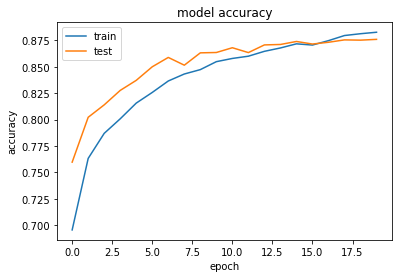

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

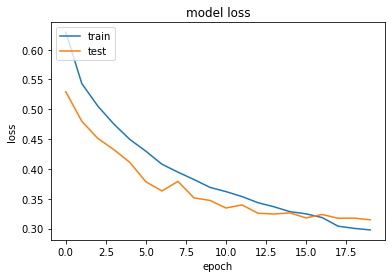

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As mentioned above, training could have been kept going but for time constraint reasons it was stopped early.

### Experiments

### These are the experiments that were attempted to create the best LSTM model. Long story short. None of them worked

In [30]:
model = Sequential()
model.add(Embedding(MAX_NUM_WORDS, 150, input_length = (256)))
model.add(LSTM(64, dropout=0.5, recurrent_dropout= 0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 256, 150)          2250000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                55040     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 2,307,219
Trainable params: 2,307,219
Non-trainable params: 0
_________________________________________________________________


First model consists of an LSTM cell with 64 passes, along with two feed forward layers that compute the softmax

In [35]:
Adam=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer=Adam,metrics=['accuracy'])

In [36]:
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0,  patience=10, verbose=0, mode='auto'),ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=False)]

In [37]:
history = model.fit(X_train, y_train, batch_size= 128, epochs=50, validation_split=0.15 ,callbacks = callbacks, verbose=1)

Train on 43350 samples, validate on 7650 samples
Epoch 1/50
43350/43350 [==============================] - 71s 2ms/step - loss: 0.6654 - accuracy: 0.7177 - val_loss: 0.7740 - val_accuracy: 0.6638
Epoch 2/50


C:\Users\jpcar\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


43350/43350 [==============================] - 70s 2ms/step - loss: 0.6092 - accuracy: 0.7442 - val_loss: 0.8049 - val_accuracy: 0.6624
Epoch 3/50
43350/43350 [==============================] - 70s 2ms/step - loss: 0.5694 - accuracy: 0.7637 - val_loss: 0.8406 - val_accuracy: 0.6527
Epoch 4/50
27136/43350 [=================>............] - ETA: 25s - loss: 0.5394 - accuracy: 0.7806

KeyboardInterrupt: 

Training interrupted due to poor results

In [67]:
model = Sequential()
model.add(Embedding(MAX_NUM_WORDS, 64, input_length = (192)))
model.add(LSTM(128, dropout=0.5, recurrent_dropout= 0.5, return_sequences= True))
model.add(LSTM(128, dropout=0.5, recurrent_dropout= 0.5))
model.add(Dense(3, activation = 'softmax'))

In [75]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 192, 64)           960000    
_________________________________________________________________
lstm_7 (LSTM)                (None, 192, 128)          98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 387       
Total params: 1,190,787
Trainable params: 1,190,787
Non-trainable params: 0
_________________________________________________________________


Second attempt at creating a vanilla LSTM network, with two LSTM layers, the first one which returns a sequence and the second one which returns the actual weights to compute the softmax. In this experiment the embedding is being learned from scratch. 

In [76]:
Adam=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer= 'rmsprop',metrics=['accuracy'])

In [77]:
history = model.fit(X_train, y_train, batch_size= 512, epochs=50, validation_split=0.15 ,callbacks = callbacks, verbose=1)

C:\Users\jpcar\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 43350 samples, validate on 7650 samples
Epoch 1/50
43350/43350 [==============================] - 27s 618us/step - loss: 0.9575 - accuracy: 0.5187 - val_loss: 0.9067 - val_accuracy: 0.5629
Epoch 2/50
43350/43350 [==============================] - 26s 610us/step - loss: 0.9551 - accuracy: 0.5197 - val_loss: 0.9161 - val_accuracy: 0.5476
Epoch 3/50
43350/43350 [==============================] - 27s 617us/step - loss: 0.9544 - accuracy: 0.5251 - val_loss: 0.9041 - val_accuracy: 0.5593
Epoch 4/50
43350/43350 [==============================] - 26s 608us/step - loss: 0.9542 - accuracy: 0.5210 - val_loss: 0.8965 - val_accuracy: 0.5735
Epoch 5/50
43350/43350 [==============================] - 26s 607us/step - loss: 0.9532 - accuracy: 0.5213 - val_loss: 0.8978 - val_accuracy: 0.5676
Epoch 6/50
43350/43350 [==============================] - 26s 609us/step - loss: 0.9532 - accuracy: 0.5207 - val_loss: 0.8926 - val_accuracy: 0.5708
Epoch 7/50
43350/43350 [==============================] -

KeyboardInterrupt: 

In [78]:
rmsprop=tf.keras.optimizers.RMSprop(learning_rate=0.005)
model.compile(loss='categorical_crossentropy',optimizer= rmsprop ,metrics=['accuracy'])

In [79]:
history = model.fit(X_train, y_train, batch_size= 512, epochs=50, validation_split=0.15 ,callbacks = callbacks, verbose=1)

Train on 43350 samples, validate on 7650 samples
Epoch 1/50
43350/43350 [==============================] - 27s 622us/step - loss: 0.9332 - accuracy: 0.5375 - val_loss: 0.8544 - val_accuracy: 0.5878
Epoch 2/50


C:\Users\jpcar\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


43350/43350 [==============================] - 26s 606us/step - loss: 0.9331 - accuracy: 0.5369 - val_loss: 0.8609 - val_accuracy: 0.5826
Epoch 3/50
43350/43350 [==============================] - 26s 604us/step - loss: 0.9319 - accuracy: 0.5364 - val_loss: 0.8603 - val_accuracy: 0.5851
Epoch 4/50
43350/43350 [==============================] - 26s 609us/step - loss: 0.9277 - accuracy: 0.5379 - val_loss: 0.8696 - val_accuracy: 0.5711
Epoch 5/50
43350/43350 [==============================] - 27s 614us/step - loss: 0.9306 - accuracy: 0.5381 - val_loss: 0.8601 - val_accuracy: 0.5809
Epoch 6/50
43350/43350 [==============================] - 26s 608us/step - loss: 0.9284 - accuracy: 0.5401 - val_loss: 0.8715 - val_accuracy: 0.5750
Epoch 7/50
43350/43350 [==============================] - 26s 607us/step - loss: 0.9283 - accuracy: 0.5406 - val_loss: 0.8566 - val_accuracy: 0.5906
Epoch 8/50
43350/43350 [==============================] - 26s 605us/step - loss: 0.9261 - accuracy: 0.5419 - val_loss

KeyboardInterrupt: 

In [83]:
model = Sequential()
model.add(Embedding(MAX_NUM_WORDS, 64, input_length = (192)))
model.add(LSTM(64, dropout=0.25, recurrent_dropout= 0.25))
model.add(Dense(3, activation = 'softmax'))

Due to poor results, and failure to generalize on the validation set a new model is created with less capacity, to see if overfitting is the main problem in training

In [84]:
model.compile(loss='categorical_crossentropy',optimizer= rmsprop ,metrics=['accuracy'])

In [85]:
history = model.fit(X_train, y_train, batch_size= 512, epochs=50, validation_split=0.15 ,callbacks = callbacks, verbose=1)

Train on 43350 samples, validate on 7650 samples
Epoch 1/50
43350/43350 [==============================] - 11s 262us/step - loss: 0.9087 - accuracy: 0.5530 - val_loss: 0.8410 - val_accuracy: 0.6080
Epoch 2/50
  512/43350 [..............................] - ETA: 11s - loss: 0.8268 - accuracy: 0.6211

C:\Users\jpcar\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


43350/43350 [==============================] - 11s 257us/step - loss: 0.7746 - accuracy: 0.6445 - val_loss: 0.7597 - val_accuracy: 0.6549
Epoch 3/50
43350/43350 [==============================] - 11s 252us/step - loss: 0.7119 - accuracy: 0.6831 - val_loss: 0.7754 - val_accuracy: 0.6506
Epoch 4/50
43350/43350 [==============================] - 11s 252us/step - loss: 0.6608 - accuracy: 0.7112 - val_loss: 0.8247 - val_accuracy: 0.6383
Epoch 5/50
43350/43350 [==============================] - 11s 253us/step - loss: 0.6169 - accuracy: 0.7372 - val_loss: 0.7857 - val_accuracy: 0.6593
Epoch 6/50
43350/43350 [==============================] - 11s 252us/step - loss: 0.5794 - accuracy: 0.7542 - val_loss: 0.8168 - val_accuracy: 0.6468
Epoch 7/50
43350/43350 [==============================] - 11s 254us/step - loss: 0.5385 - accuracy: 0.7761 - val_loss: 0.7838 - val_accuracy: 0.6458
Epoch 8/50
43350/43350 [==============================] - 11s 252us/step - loss: 0.5037 - accuracy: 0.7938 - val_loss

In [86]:
model = Sequential()
model.add(Embedding(MAX_NUM_WORDS, 64, input_length = (192)))
model.add(LSTM(64, dropout=0.25, recurrent_dropout= 0.25, recurrent_regularizer= "l2"))
model.add(Dense(3, activation = 'softmax'))

In [87]:
model.compile(loss='categorical_crossentropy',optimizer= rmsprop ,metrics=['accuracy'])

In [88]:
history = model.fit(X_train, y_train, batch_size= 512, epochs=50, validation_split=0.15 ,callbacks = callbacks, verbose=1)

Train on 43350 samples, validate on 7650 samples
Epoch 1/50
43350/43350 [==============================] - 11s 259us/step - loss: 0.9599 - accuracy: 0.5547 - val_loss: 0.8345 - val_accuracy: 0.6190
Epoch 2/50
  512/43350 [..............................] - ETA: 10s - loss: 0.8472 - accuracy: 0.6172

C:\Users\jpcar\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


43350/43350 [==============================] - 11s 251us/step - loss: 0.7890 - accuracy: 0.6448 - val_loss: 0.8540 - val_accuracy: 0.6125
Epoch 3/50
43350/43350 [==============================] - 11s 253us/step - loss: 0.7400 - accuracy: 0.6807 - val_loss: 0.8233 - val_accuracy: 0.6373
Epoch 4/50
43350/43350 [==============================] - 11s 250us/step - loss: 0.7038 - accuracy: 0.6962 - val_loss: 0.8110 - val_accuracy: 0.6322
Epoch 5/50
43350/43350 [==============================] - 11s 251us/step - loss: 0.6567 - accuracy: 0.7208 - val_loss: 0.8046 - val_accuracy: 0.6429
Epoch 6/50
43350/43350 [==============================] - 11s 250us/step - loss: 0.6201 - accuracy: 0.7382 - val_loss: 0.8246 - val_accuracy: 0.6431
Epoch 7/50
43350/43350 [==============================] - 11s 250us/step - loss: 0.5806 - accuracy: 0.7542 - val_loss: 0.8403 - val_accuracy: 0.6489
Epoch 8/50
43350/43350 [==============================] - 11s 251us/step - loss: 0.5389 - accuracy: 0.7759 - val_loss

In [309]:
model = Sequential()
model.add(Embedding(MAX_NUM_WORDS, 32, input_length = (100)))
model.add(LSTM(32, dropout=0.25, recurrent_dropout= 0.25, recurrent_regularizer= "l2"))
model.add(Dense(3, activation = 'softmax'))

In [310]:
model.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_42 (Embedding)     (None, 100, 32)           640000    
_________________________________________________________________
lstm_45 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_46 (Dense)             (None, 3)                 99        
Total params: 648,419
Trainable params: 648,419
Non-trainable params: 0
_________________________________________________________________


Next attempt to create a vanilla LSTM with very small capacity, due to the training problems. Overfitting does not seem ot be the issue because training accuracy is not improving that much as well.

In [311]:
model.compile(loss='categorical_crossentropy',optimizer= rmsprop ,metrics=['accuracy'])

In [312]:
history = model.fit(X_train, y_train, batch_size= 512, epochs=50, validation_split=0.15 ,callbacks = callbacks, verbose=1)

Train on 43350 samples, validate on 7650 samples
Epoch 1/50
43350/43350 [==============================] - 6s 136us/step - loss: 0.9206 - accuracy: 0.5621 - val_loss: 0.8619 - val_accuracy: 0.5971
Epoch 2/50
 1024/43350 [..............................] - ETA: 5s - loss: 0.8213 - accuracy: 0.62

C:\Users\jpcar\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


43350/43350 [==============================] - 6s 129us/step - loss: 0.7720 - accuracy: 0.6447 - val_loss: 0.8035 - val_accuracy: 0.6275
Epoch 3/50
43350/43350 [==============================] - 6s 128us/step - loss: 0.7194 - accuracy: 0.6799 - val_loss: 0.8080 - val_accuracy: 0.6227
Epoch 4/50
43350/43350 [==============================] - 6s 129us/step - loss: 0.6814 - accuracy: 0.6982 - val_loss: 0.8238 - val_accuracy: 0.6166
Epoch 5/50
43350/43350 [==============================] - 6s 128us/step - loss: 0.6525 - accuracy: 0.7162 - val_loss: 0.8161 - val_accuracy: 0.6261
Epoch 6/50
43350/43350 [==============================] - 6s 129us/step - loss: 0.6304 - accuracy: 0.7284 - val_loss: 0.8314 - val_accuracy: 0.6295
Epoch 7/50
18944/43350 [============>.................] - ETA: 3s - loss: 0.5884 - accuracy: 0.7488

KeyboardInterrupt: 

In [335]:
model_1 = Sequential()
model_1.add(Embedding(MAX_NUM_WORDS, 24, input_length = (100)))
model_1.add(LSTM(16, dropout=0.5, recurrent_dropout= 0.25, recurrent_regularizer= "l1_l2", bias_regularizer= "l2"))
model_1.add(Dense(16, activation = 'relu'))
model_1.add(BatchNormalization())
model_1.add(Dense(3, activation = 'softmax'))

In [336]:
from keras.layers import BatchNormalization

In [337]:
model_1.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_44 (Embedding)     (None, 100, 24)           60000     
_________________________________________________________________
lstm_47 (LSTM)               (None, 16)                2624      
_________________________________________________________________
dense_49 (Dense)             (None, 16)                272       
_________________________________________________________________
batch_normalization_4 (Batch (None, 16)                64        
_________________________________________________________________
dense_50 (Dense)             (None, 3)                 51        
Total params: 63,011
Trainable params: 62,979
Non-trainable params: 32
_________________________________________________________________


In [338]:
model_1.compile(loss='categorical_crossentropy',optimizer= rmsprop ,metrics=['accuracy'])

In [339]:
history = model_1.fit(X_train, y_train, batch_size= 512, epochs=50, validation_data=(X_test, y_test) ,callbacks = callbacks, verbose=1)

Train on 51000 samples, validate on 9000 samples
Epoch 1/50
51000/51000 [==============================] - 7s 140us/step - loss: 1.1935 - accuracy: 0.5346 - val_loss: 1.1498 - val_accuracy: 0.3723
Epoch 2/50
 1024/51000 [..............................] - ETA: 6s - loss: 0.9196 - accuracy: 0.6201

C:\Users\jpcar\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


51000/51000 [==============================] - 7s 131us/step - loss: 0.9184 - accuracy: 0.5961 - val_loss: 1.0628 - val_accuracy: 0.5182
Epoch 3/50
51000/51000 [==============================] - 7s 131us/step - loss: 0.8826 - accuracy: 0.6099 - val_loss: 0.9985 - val_accuracy: 0.5392
Epoch 4/50
51000/51000 [==============================] - 7s 132us/step - loss: 0.8694 - accuracy: 0.6187 - val_loss: 0.9249 - val_accuracy: 0.5798
Epoch 5/50
51000/51000 [==============================] - 7s 131us/step - loss: 0.8600 - accuracy: 0.6220 - val_loss: 0.9056 - val_accuracy: 0.5877
Epoch 6/50
51000/51000 [==============================] - 7s 131us/step - loss: 0.8521 - accuracy: 0.6258 - val_loss: 0.9071 - val_accuracy: 0.5867
Epoch 7/50
51000/51000 [==============================] - 7s 131us/step - loss: 0.8447 - accuracy: 0.6301 - val_loss: 0.9070 - val_accuracy: 0.5937
Epoch 8/50
51000/51000 [==============================] - 7s 131us/step - loss: 0.8406 - accuracy: 0.6342 - val_loss: 0.890

KeyboardInterrupt: 

In [407]:
tokenizer.word_index

{'code': 1,
 'new': 2,
 'string': 3,
 'int': 4,
 'using': 5,
 'error': 6,
 'like': 7,
 'file': 8,
 'want': 9,
 'return': 10,
 'public': 11,
 'get': 12,
 'im': 13,
 'function': 14,
 'use': 15,
 'class': 16,
 'data': 17,
 'c': 18,
 'value': 19,
 'import': 20,
 'name': 21,
 'void': 22,
 'x': 23,
 'would': 24,
 'array': 25,
 'help': 26,
 'one': 27,
 'need': 28,
 'var': 29,
 'way': 30,
 'list': 31,
 'trying': 32,
 'id': 33,
 'print': 34,
 'line': 35,
 'number': 36,
 'else': 37,
 'know': 38,
 'user': 39,
 'app': 40,
 'please': 41,
 'null': 42,
 'input': 43,
 'type': 44,
 'b': 45,
 'set': 46,
 'following': 47,
 'object': 48,
 'text': 49,
 'true': 50,
 'create': 51,
 'make': 52,
 'work': 53,
 'time': 54,
 'find': 55,
 'run': 56,
 'tried': 57,
 'python': 58,
 'method': 59,
 'example': 60,
 'n': 61,
 'dont': 62,
 'problem': 63,
 'div': 64,
 'private': 65,
 'thanks': 66,
 'i': 67,
 'table': 68,
 'first': 69,
 'main': 70,
 'image': 71,
 'add': 72,
 'output': 73,
 'button': 74,
 'test': 75,
 'two':

In [625]:
num_tokens = len(voc) + 2
embedding_dim = 200
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 6926 words (3073 misses)


Attempt at using glove 6B 200 embeddings, and use those for training. Main problem resides in the fact that the vocabulary for the embeddings does not correspond well with the dataset being used. Probably because Stack Overflow questions include very technical language.

In [512]:
embedding_matrix

array([[ 0.19618   ,  0.54193002,  0.44931   , ...,  0.56757998,
         0.24089   , -0.033112  ],
       [-0.013127  ,  0.082789  , -0.02023   , ...,  0.21653   ,
         0.0048408 ,  0.55470002],
       [-0.13451999,  0.42318001, -0.20051999, ..., -0.0091233 ,
         0.31496999,  0.47435999],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [600]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False, input_length = 200)

In [601]:
from tensorflow.keras import layers


In [602]:
int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.SpatialDropout1D(0.3)(embedded_sequences)
x = layers.LSTM(100, recurrent_dropout= 0.25, dropout = 0.25)(embedded_sequences)
x = layers.Dense(256, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(3, activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)

model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, None)]            0         
_________________________________________________________________
embedding_5 (Embedding)      (None, None, 200)         10000200  
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               120400    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               25856     
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 771       
Total params: 10,147,227
Trainable params: 147,027
Non-trainable params: 10,000,200
_________________________________________

In [603]:
y_train

array([0, 2, 1, ..., 1, 1, 2])

In [604]:
x_train

array([[ 95,  23,  40, ...,   0,   0,   0],
       [ 14,   4, 328, ...,   0,   0,   0],
       [ 14,  34,  54, ...,   0,   0,   0],
       ...,
       [ 14,   4, 331, ...,   0,   0,   0],
       [824,  16, 407, ...,   0,   0,   0],
       [515,   4, 329, ...,   0,   0,   0]], dtype=int64)

In [605]:
Adam=tf.keras.optimizers.Adam(learning_rate=0.01)

In [608]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer='adagrad', metrics=["accuracy"]
)
model.fit(x_train, y_train, batch_size=2048, epochs=100, validation_data=(x_test, y_test))

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 12s 226us/sample - loss: 1.0944 - accuracy: 0.3486 - val_loss: 1.0929 - val_accuracy: 0.3555
Epoch 2/100
54000/54000 [==============================] - 10s 192us/sample - loss: 1.0940 - accuracy: 0.3491 - val_loss: 1.0927 - val_accuracy: 0.3558
Epoch 3/100
54000/54000 [==============================] - 10s 194us/sample - loss: 1.0935 - accuracy: 0.3541 - val_loss: 1.0925 - val_accuracy: 0.3562
Epoch 4/100
54000/54000 [==============================] - 11s 195us/sample - loss: 1.0935 - accuracy: 0.3516 - val_loss: 1.0923 - val_accuracy: 0.3570
Epoch 5/100
54000/54000 [==============================] - 11s 195us/sample - loss: 1.0933 - accuracy: 0.3539 - val_loss: 1.0922 - val_accuracy: 0.3568
Epoch 6/100
54000/54000 [==============================] - 10s 194us/sample - loss: 1.0930 - accuracy: 0.3525 - val_loss: 1.0921 - val_accuracy: 0.3572
Epoch 7/100
54000/54000 [==============

KeyboardInterrupt: 

Training is stopped due to poor performance.